# Logistic Regression 

**Assignment** Build a Logistic Regression classifier to recognize cat pictures. 

**Data Set** "data.h5"
- Training set of m_train images labeled as (cat; y=1) or (non-cat; y=0)
- Test set of m_test images labeled as cat or non-cat
- Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). 
- Thus, each image is square (height = num_px) and (width = num_px).


**You want to:**
- Build a Logistic Regression learning algorithm:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
    
- Gather all three functions above into a main model function, in the right order.

**Question** What is the general architecture of you learning algorithm? 

**Equations**:

For a single training example $\underline{x}^{(i)}$:

$$z^{(i)} = \underline{w}^T \underline{x}^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = {\rm{sigmoid}}(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Steps**:
    - Preprocessing: Convert training and testing data into vectors 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude
    
**Functions**
- Sigmoid
- Initialization for $\underline{w}$ and $b$ with the **correct dimensions**
- Implement Backpropagation using equations we derived in class. Hint: Need to compute Cost function and its gradients to output $d\underline{w}$ and $db$
- Implement Gradient Descent (Optimization step): Here use a number of iterations 5000 and learning rate 0.005. 
  You are allowed to use a for loop here to run over iterations.
- After learning the parameters using GD; you need to implement a prediction function to out the prediction $\hat{y}$
- Builds the logistic regression model by calling the function you implemented
- Use the test data set to test your model (Generalization).
- Compute the teaining error (or accuracy) and the testing error (or accuracy)




In [11]:
import numpy as np
import matplotlib.pyplot as plt   # plot graphs
import h5py  # common package to interact with a dataset that is stored on an H5 file.


from PIL import Image
import scipy # use these two if you want to use your own image

%matplotlib inline 

In [12]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # convert to row vector
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0])) # convert to row vector
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [13]:
# Loading data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


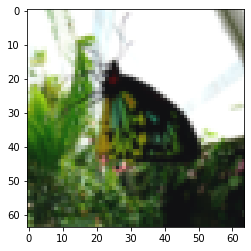

In [14]:
# Example
index = 16
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")